In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from scipy.spatial import Voronoi, voronoi_plot_2d

from sklearn.datasets import make_blobs


plt.style.use('default')
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')



### K-Means

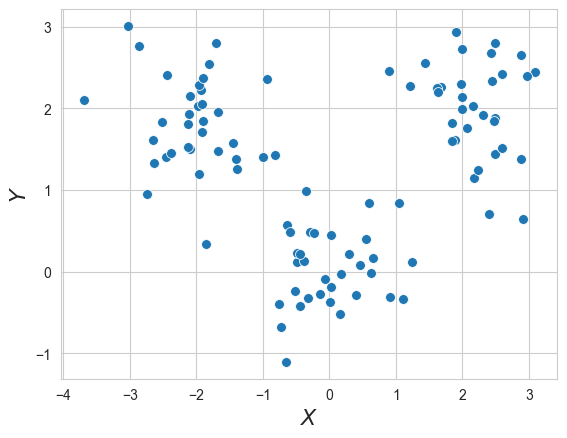

In [2]:
x, c = make_blobs(n_samples=100, cluster_std = .5, centers = [[-2,2], [2,2], [0,0]])
data_blobs = pd.DataFrame( {'x': x[:,0], 'y': x[:,1], 'cluster': c} )

sns.scatterplot(x='x', y='y', s=50, data=data_blobs)
plt.xlabel(r'$X$', fontsize=16)
plt.ylabel(r'$Y$', fontsize=16);

In [7]:
def initialize_cluster_centers(data, k):
    indices = np.random.choice(range(data.shape[0]), replace = False, size = k)
    return data[indices]

def assign_points_to_clusters(data, centers):
    """
    assigns clusters based on closest centroids
    """
    k = len(centers)

    for i, x in data.iterrows():

        # compute the distance of x to each centroid
        distances = np.sqrt(np.sum((centers-x.values[:2])**2, axis = 1))

        # compute the centroid closest to point x
        closest_centroid = min(range(k), key = lambda f: distances[f])

        # assign data to corresponding cluster
        data.at[i, 'cluster_assigned'] = int(closest_centroid)
        
def update_cluster_centers(data, k):
    centroids = list()
    for i in range(k):
        centroids.append(data[data['cluster_assigned']==i].mean().values[:2])
    return np.array(centroids)

def k_means(data, k=3, max_iter=10, plot_steps=True):

    centroids = initialize_cluster_centers(data[['x', 'y']].values, k=k)

    plt.clf()
    plt.title('Initialisation')
    ax = sns.scatterplot(x='x', y='y', s=50, data=data)
    plt.scatter(centroids[:,0], centroids[:,1], marker = "X", c = "k", s=150, alpha=0.75)
    ax.set_xlim(min(data['x']),max(data['x']))
    ax.set_ylim(min(data['y']),max(data['y']))    
    plt.show()

    for i in range(max_iter):
        assign_points_to_clusters(data, centroids)
        centroids_new = update_cluster_centers(data, k)
        


        centroids = centroids_new        
        
    if plot_steps:
        plt.clf()
        plt.title('Assigned clusters')
        ax = sns.scatterplot(x='x', y='y', s=50, data=data, hue='cluster_assigned', palette=sns.color_palette("Set1", k))
        plt.scatter(centroids[:,0], centroids[:,1], marker = "X", c = "k", s=150, alpha=0.75)
        ax.set_xlim(min(data['x']),max(data['x']))
        ax.set_ylim(min(data['y']),max(data['y']))
        plt.show()


In [9]:
def L(data):
    S = 0
    # the total number of clusters
    k = int(data['cluster_assigned'].max())

    # for each cluster 
    for i in range(k):
        # C_i contains all points assigned to cluster i
        C_i = data[data['cluster_assigned']==i].values

        # compute the cluster center
        center_x = np.mean(C_i[:,0])
        center_y = np.mean(C_i[:,1])

        # for each point, compute the distance between the point and the center
        for i in range(C_i.shape[0]):            
            S += (C_i[i][0] - center_x)**2 + (C_i[i][1] - center_y)**2
    return S